In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/Summary


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', 'Random'))
sys.path.append(os.path.join('..', 'SA'))
sys.path.append(os.path.join('..', 'QA'))
sys.path.append(os.path.join('..', '4ti2', 'functions'))

In [4]:
import QA_DwaveSampler_AutoEmbedding as qda
import random_exact_test_functions as ret
import Neal_exact_test_functions as net
import zsolve_t1 as zt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math

## random

In [5]:
num_reads = 10000

#data:[pertime, pertime, ... , pertime]
random_time_dic = {}
for bit in [20 ,25, 30, 35, 40]:
    random_time_dic[bit] = []
    for num in [0, 1, 2, 3, 4]:
        df_path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(df_path, sep=',')
        valid_y_dic, calculation_time = ret.find_valid_y(df, num_reads)
        if len(valid_y_dic) > 0:
            random_time_dic[bit].append(calculation_time/len(valid_y_dic))

In [6]:
random_time_dic

{20: [0.008216126865109072,
  0.016391838750531598,
  0.04828689098358154,
  0.04989731788635254,
  0.04582330703735352],
 25: [0.1233820120493571,
  0.4956386089324951,
  0.03298638712975287,
  0.09478180408477783],
 30: [0.101399474673801,
  0.14991474151611328,
  0.1942413647969564,
  0.5095779895782471],
 35: [0.12998127937316895],
 40: [0.56931471824646, 0.2284095287322998]}

In [7]:
random_mean_time = np.array([statistics.mean(random_time_dic[20]), statistics.mean(random_time_dic[25]), statistics.mean(random_time_dic[30]), statistics.mean(random_time_dic[35]), statistics.mean(random_time_dic[40])])
random_std_time = np.array([statistics.pstdev(random_time_dic[20]), statistics.pstdev(random_time_dic[25]), statistics.pstdev(random_time_dic[30]), statistics.pstdev(random_time_dic[35]), statistics.pstdev(random_time_dic[40])])

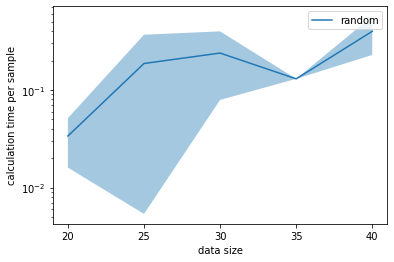

In [8]:
x = [20, 25, 30, 35, 40]
fig, ax = plt.subplots(1)

ax.plot(x, random_mean_time, label='random')

ax.fill_between(x, random_mean_time + random_std_time, random_mean_time - random_std_time, alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()

## SA

In [9]:
num_reads = 10000

#data:[pertime, pertime, ... , pertime]
SA_time_dic = {}
for bit in [20 ,25, 30, 35, 40]:
    SA_time_dic[bit] = []
    for num in [0, 1, 2, 3, 4]:
        df_path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(df_path, sep=',')
        time_0 = time.time()
        res = net.make_res_data(df, num_reads)
        valid_y_dic = net.find_valid_y(res)
        time_1 = time.time()
        calculation_time = time_1 - time_0
        if len(valid_y_dic) > 0:
            SA_time_dic[bit].append(calculation_time/len(valid_y_dic))

In [10]:
SA_time_dic

{20: [0.004872754381003327,
  0.009614242447747124,
  0.02125853038969494,
  0.010056379382880598,
  0.010586409774047649],
 25: [0.006011396975153387,
  0.008014425528900963,
  0.005088312601615305,
  0.00576212494641194,
  0.024014584311802676],
 30: [0.0063855238233842294,
  0.006181880074549063,
  0.006215660820635324,
  0.0058566728885956565,
  0.006013498047479785],
 35: [0.007808474291479807,
  0.0071058949921950715,
  0.007520608123987806,
  0.006934679086763241,
  0.007292952407541914],
 40: [0.008141745979897292,
  0.009542129663350952,
  0.00860969312812971,
  0.008118513868891309,
  0.00866715829031808]}

In [11]:
SA_mean_time = np.array([statistics.mean(SA_time_dic[20]), statistics.mean(SA_time_dic[25]), statistics.mean(SA_time_dic[30]), statistics.mean(SA_time_dic[35]), statistics.mean(SA_time_dic[40])])
SA_std_time = np.array([statistics.pstdev(SA_time_dic[20]), statistics.pstdev(SA_time_dic[25]), statistics.pstdev(SA_time_dic[30]), statistics.pstdev(SA_time_dic[35]), statistics.pstdev(SA_time_dic[40])])

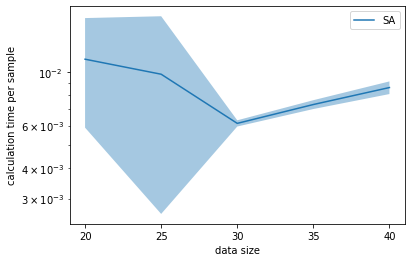

In [13]:
x = [20, 25, 30, 35, 40]
fig, ax = plt.subplots(1)

ax.plot(x, SA_mean_time, label='SA')

ax.fill_between(x, SA_mean_time + SA_std_time, SA_mean_time - SA_std_time, alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()

## 4ti2

In [15]:
_20bit_4ti2 = [4.94/16464, 0.23/2940, 2.47/1050, 0.13/2640, 0.08/2464]
_25bit_4ti2 = [6.26/12600, 1.45/5850, 522.78/109010, 60.29/23460, 4.29/1260]
_30bit_4ti2 = [114590.22/58296, 70282.15/819390, 4964.31/205920, 2701.98/168168, 594.18/89100]

In [16]:
_4ti2_time_dic = {20:_20bit_4ti2, 25:_25bit_4ti2, 30:_30bit_4ti2}
_4ti2_time_dic

{20: [0.0003000485908649174,
  7.823129251700681e-05,
  0.0023523809523809526,
  4.9242424242424245e-05,
  3.246753246753247e-05],
 25: [0.0004968253968253968,
  0.00024786324786324785,
  0.00479570681588845,
  0.002569906223358909,
  0.003404761904761905],
 30: [1.965661794977357,
  0.08577374632348454,
  0.024107954545454547,
  0.01606714713857571,
  0.006668686868686868]}

In [18]:
_4ti2_mean_time = np.array([statistics.mean(_4ti2_time_dic[20]), statistics.mean(_4ti2_time_dic[25]), statistics.mean(_4ti2_time_dic[30])])
_4ti2_std_time = np.array([statistics.pstdev(_4ti2_time_dic[20]), statistics.pstdev(_4ti2_time_dic[25]), statistics.pstdev(_4ti2_time_dic[30])])

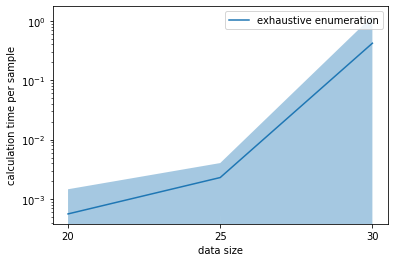

In [20]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, _4ti2_mean_time, label='exhaustive enumeration')

ax.fill_between(x, _4ti2_mean_time + _4ti2_std_time, _4ti2_mean_time - _4ti2_std_time, alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()

## QA

In [ ]:
chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}
n, num_reads = 10, 1000

In [ ]:
QA_time_dic = {}
for bit in [20 ,25, 30]:
    QA_time_dic[bit] = []
    for num in [0, 1, 2, 3, 4]:
        valid_y_chain_info_dic[bit][num] = {}
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        bqm = qda.make_Hamiltonian(df)
        chain_strength = chain_dic[bit]
        QDA = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)
        valid_y_info_dic, calculation_time = QDA.find_valid_y_time_ntimes()
        if len(valid_y_dic) > 0:
            QA_time_dic[bit].append(calculation_time/len(valid_y_info_dic))

In [ ]:
QA_time_dic

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['4ti2'][0], label='exhaustive enumeration')
ax.plot(x, time_dic['random'][0], label='random')
ax.plot(x, time_dic['SA'][0], label='SA')
ax.plot(x, time_dic['QA'][0], label='QA')

ax.fill_between(x, time_dic['4ti2'][0] + time_dic['4ti2'][1], time_dic['4ti2'][0] - time_dic['4ti2'][1], alpha=0.4)
ax.fill_between(x, time_dic['random'][0] + time_dic['random'][1], time_dic['random'][0] - time_dic['random'][1], alpha=0.4)
ax.fill_between(x, time_dic['SA'][0] + time_dic['SA'][1], time_dic['SA'][0] - time_dic['SA'][1], alpha=0.4)
ax.fill_between(x, time_dic['QA'][0] + time_dic['QA'][1], time_dic['QA'][0] - time_dic['QA'][1], alpha=0.4)

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
plt.savefig('20210105_mean_std_calculation_time202530_log')
plt.show()

In [ ]:
time_dic = {}

_20bit_4ti2 = [4.94/16464, 0.23/2940, 2.47/1050, 0.13/2640, 0.08/2464]
_25bit_4ti2 = [6.26/12600, 1.45/5850, 522.78/109010, 60.29/23460, 4.29/1260]
_30bit_4ti2 = [114590.22/58296, 70282.15/819390, 4964.31/205920, 2701.98/168168, 594.18/89100]
time_dic['4ti2'] = []
_4ti2_mean = np.array([statistics.mean(_20bit_4ti2), statistics.mean(_25bit_4ti2), statistics.mean(_30bit_4ti2)])
_4ti2_std = np.array([statistics.pstdev(_20bit_4ti2), statistics.pstdev(_25bit_4ti2), statistics.pstdev(_30bit_4ti2)])
time_dic['4ti2'].append(_4ti2_mean)
time_dic['4ti2'].append(_4ti2_std)

_20bit_random = [0.18552691740005683/165, 0.0709505495000485/32, 0.06933074559992747/9, 0.18460488030004854/22, 0.18051538510007958/15]
_25bit_random = [0.07384206859999995/3, 0.16367672419999996/1, 0.1738539143999999/28, 0.15510272619999999/11]
_30bit_random = [0.07409351099999997/3, 0.15929082999999994/13, 0.11666194870000002/2]
time_dic['random'] = []
random_mean = np.array([statistics.mean(_20bit_random), statistics.mean(_25bit_random), statistics.mean(_30bit_random)])
random_std = np.array([statistics.pstdev(_20bit_random), statistics.pstdev(_25bit_random), statistics.pstdev(_30bit_random)])
time_dic['random'].append(random_mean)
time_dic['random'].append(random_std)

_20bit_SA = [39.3638699054718/7396, 30.394564867019653/2819, 24.911816835403442/1050, 31.526935815811157/2576, 29.0723819732666/2411]
_25bit_SA = [51.21703791618347/6780, 42.17095327377319/4525, 50.918558835983276/9541, 55.875486850738525/7860, 36.98383378982544/1258]
_30bit_SA = [65.2171459197998/8969, 56.08537817001343/8860, 63.485042095184326/9503, 57.39350175857544/9310, 58.64697289466858/8891]
time_dic['SA'] = []
SA_mean = np.array([statistics.mean(_20bit_SA), statistics.mean(_25bit_SA), statistics.mean(_30bit_SA)])
SA_std = np.array([statistics.pstdev(_20bit_SA), statistics.pstdev(_25bit_SA), statistics.pstdev(_30bit_SA)])
time_dic['SA'].append(SA_mean)
time_dic['SA'].append(SA_std)

_20bit_QA = [0.0032529830932617188/1100, 0.0032758712768554688/600, 0.0035250186920166016/300, 0.003698110580444336/300, 0.004288196563720703/200]
_25bit_QA = [0.003081083297729492/180, 0.002710103988647461/10, 0.004812002182006836/320, 0.003191232681274414/30, 0.018784046173095703/30]
_30bit_QA = [0.0031800270080566406/40, 0.004498004913330078/70, 0.003103971481323242/30]
time_dic['QA'] = []
QA_mean = np.array([statistics.mean(_20bit_QA), statistics.mean(_25bit_QA), statistics.mean(_30bit_QA)])
QA_std = np.array([statistics.pstdev(_20bit_QA), statistics.pstdev(_25bit_QA), statistics.pstdev(_30bit_QA)])
time_dic['QA'].append(QA_mean)
time_dic['QA'].append(QA_std)

#mean_calculation_time202530['random'] = [0.11997059858/48.2, 0.101650324/9.6, 0.08167518044/1.6]
#mean_calculation_time202530['SA'] = [3.8748642719601/3260.8, 6.77062311042012/5969.6, 7.96528926591992/9087.2]
#mean_calculation_time202530['QA'] = [0.00984470959988539/429, 0.0074053542000007/95.4, 0.0103936540000076/28.8]

In [ ]:
time_dic

In [ ]:
_4ti2_mean

In [ ]:
_4ti2_std

In [ ]:
random_mean

In [ ]:
random_std

In [ ]:
SA_mean

In [ ]:
SA_std

In [ ]:
QA_mean

In [ ]:
QA_std

In [ ]:
1282.537/1.07870246

In [ ]:
660.861/8.24078681

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['4ti2'][0], label='exhaustive enumeration')
ax.plot(x, time_dic['random'][0], label='random')
ax.plot(x, time_dic['SA'][0], label='SA')
ax.plot(x, time_dic['QA'][0], label='QA')

ax.fill_between(x, time_dic['4ti2'][0] + time_dic['4ti2'][1], time_dic['4ti2'][0] - time_dic['4ti2'][1], alpha=0.4)
ax.fill_between(x, time_dic['random'][0] + time_dic['random'][1], time_dic['random'][0] - time_dic['random'][1], alpha=0.4)
ax.fill_between(x, time_dic['SA'][0] + time_dic['SA'][1], time_dic['SA'][0] - time_dic['SA'][1], alpha=0.4)
ax.fill_between(x, time_dic['QA'][0] + time_dic['QA'][1], time_dic['QA'][0] - time_dic['QA'][1], alpha=0.4)

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
plt.savefig('mean_std_calculation_time202530_log')
plt.show()

In [ ]:
x = [20, 25, 30]
plt.xlabel('data size')
plt.ylabel('calculation time per sample')
plt.plot(x, time_dic['4ti2'][0], label='exhaustive enumeration')
plt.plot(x, time_dic['random'][0], label='random')
plt.plot(x, time_dic['SA'][0], label='SA')
plt.plot(x, time_dic['QA'][0], label='QA')
plt.xticks(x, x)
plt.legend(ncol=2)
plt.yscale('log')
plt.savefig('mean_log_calculation_time202530')
plt.show()

In [ ]:
x = [20, 25, 30]
plt.xlabel('data size')
plt.ylabel('calculation time per sample')
plt.plot(x, time_dic['4ti2'][0], label='exhaustive enumeration')
plt.plot(x, time_dic['random'][0], label='random')
plt.plot(x, time_dic['SA'][0], label='SA')
plt.plot(x, time_dic['QA'][0], label='QA')
plt.xticks(x, x)
plt.legend()
plt.savefig('mean_calculation_time202530')
plt.show()

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['4ti2'][0], label='exhaustive enumeration')
ax.plot(x, time_dic['random'][0], label='random')
ax.plot(x, time_dic['SA'][0], label='SA')
ax.plot(x, time_dic['QA'][0], label='QA')

ax.fill_between(x, time_dic['4ti2'][0] + time_dic['4ti2'][1], time_dic['4ti2'][0] - time_dic['4ti2'][1], alpha=0.4)
ax.fill_between(x, time_dic['random'][0] + time_dic['random'][1], time_dic['random'][0] - time_dic['random'][1], alpha=0.4)
ax.fill_between(x, time_dic['SA'][0] + time_dic['SA'][1], time_dic['SA'][0] - time_dic['SA'][1], alpha=0.4)
ax.fill_between(x, time_dic['QA'][0] + time_dic['QA'][1], time_dic['QA'][0] - time_dic['QA'][1], alpha=0.4)

ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
#ax.set_yscale('log')
plt.savefig('mean_std_calculation_time202530')
plt.show()

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['QA'][0], label='QA')

ax.fill_between(x, time_dic['QA'][0] + time_dic['QA'][1], time_dic['QA'][0] - time_dic['QA'][1], alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['SA'][0], label='SA')

ax.fill_between(x, time_dic['SA'][0] + time_dic['SA'][1], time_dic['SA'][0] - time_dic['SA'][1], alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()

In [ ]:
x = [20, 25, 30]
fig, ax = plt.subplots(1)

ax.plot(x, time_dic['random'][0], label='random')

ax.fill_between(x, time_dic['random'][0] + time_dic['random'][1], time_dic['random'][0] - time_dic['random'][1], alpha=0.4)

ax.legend()
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(x)
ax.set_yscale('log')
#plt.savefig('mean_std_calculation_time202530_log')
plt.show()